In [19]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import pearsonr


In [20]:
df = pd.read_csv('../df_primera_limpieza.csv', index_col=0)

In [21]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,0
0,Resort Hotel,False,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,PRT,NaN,Direct,0.0,NaN,0.0,C,C,3.0,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN
1,Resort Hotel,False,737.0,NaN,July,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,NaN,NaN,Direct,0.0,0.0,0.0,NaN,C,4.0,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN
2,Resort Hotel,False,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,NaN,Direct,0.0,0.0,0.0,A,C,0.0,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN
3,Resort Hotel,False,13.0,NaN,July,27.0,1.0,0.0,1.0,1.0,NaN,0.0,BB,GBR,Corporate,Corporate,0.0,0.0,0.0,A,A,0.0,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN
4,Resort Hotel,False,14.0,NaN,July,NaN,1.0,0.0,2.0,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23.0,2017.0,August,35.0,30.0,2.0,5.0,2.0,0.0,0.0,BB,NaN,Offline TA/TO,TA/TO,0.0,0.0,0.0,A,A,0.0,394.0,NaN,0.0,NaN,96.14,0.0,0.0,Check-Out,2017-06-09 00:00:00,NaN
119386,City Hotel,False,102.0,NaN,August,35.0,31.0,2.0,5.0,3.0,NaN,0.0,BB,FRA,NaN,TA/TO,0.0,NaN,0.0,E,E,0.0,9.0,NaN,0.0,Transient,225.43,0.0,2.0,Check-Out,2017-07-09 00:00:00,NaN
119387,City Hotel,False,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,NaN,D,0.0,9.0,NaN,0.0,Transient,157.71,0.0,4.0,Check-Out,2017-07-09 00:00:00,NaN
119388,City Hotel,False,109.0,NaN,August,35.0,31.0,2.0,5.0,55.0,0.0,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,89.0,NaN,0.0,Transient,104.40,0.0,0.0,Check-Out,2017-07-09 00:00:00,NaN


In [22]:
df1 = df.iloc[:, 0:8]

# Imprimir los tipos de datos de las columnas seleccionadas
print(df1.dtypes)

hotel                         object
is_canceled                     bool
lead_time                    float64
arrival_date_year            float64
arrival_date_month            object
arrival_date_week_number     float64
arrival_date_day_of_month    float64
stays_in_weekend_nights      float64
dtype: object


In [23]:
df1.isnull().sum()/df1.shape[0]*100

hotel                         0.000000
is_canceled                   0.000000
lead_time                     0.000000
arrival_date_year            45.745519
arrival_date_month            0.000000
arrival_date_week_number     15.540019
arrival_date_day_of_month     0.100843
stays_in_weekend_nights       0.000000
dtype: float64

In [24]:
def exploracion(df1):
    forma = df1.shape
    print(f"La forma es {forma}")
    print("_______________")
    columnas = df1.columns
    print(f"Las columnas son {columnas}")
    print("_______________")
    nulos = df1.isna().sum().reset_index()
    print(f"Los nulos son:")
    display(nulos)
    print("_______________")
    duplicados = df1.duplicated().sum()
    print(f"Hay {duplicados} duplicados")
    print("_______________")
    tipo_dato = df1.dtypes.reset_index()
    print(f"Los datos son de tipo:")
    display(tipo_dato)

In [25]:
exploracion(df1)

La forma es (118005, 8)
_______________
Las columnas son Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights'],
      dtype='object')
_______________
Los nulos son:


,index,0
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,53982
4,arrival_date_month,0
5,arrival_date_week_number,18338
6,arrival_date_day_of_month,119
7,stays_in_weekend_nights,0


_______________
Hay 36863 duplicados
_______________
Los datos son de tipo:


,index,0
0,hotel,object
1,is_canceled,bool
2,lead_time,float64
3,arrival_date_year,float64
4,arrival_date_month,object
5,arrival_date_week_number,float64
6,arrival_date_day_of_month,float64
7,stays_in_weekend_nights,float64


In [26]:
# Eliminar duplicados
df1 = df1.drop_duplicates()

# Muestra los duplicados que hay
duplicados_filas = df1[df1.duplicated()]
if not duplicados_filas.empty:
    print("Filas duplicadas:")
    display(duplicados_filas)
    print("_______________")

In [27]:
# Función para ver los valores unicos de las columnas
def unique_values(data):
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"Valores únicos en la columna '{column}': {unique_values}")
        print("-----------------------------------------")
print(unique_values(df1))

Valores únicos en la columna 'hotel': ['Resort Hotel' 'City Hotel']
-----------------------------------------
Valores únicos en la columna 'is_canceled': [False  True]
-----------------------------------------
Valores únicos en la columna 'lead_time': [342. 737.   7.  13.  14.   0.   9.  85.  75.  23.  35.  68.  18.  37.
  12.  72. 127.  78.  48.  60.  77.  99. 118.  95.  96.  69.  45.  40.
  15.  36.  43.  70.  16. 107.  47. 113.  90.  50.  93.  76.   3.   1.
  10.   5.  17.  51.  71.  63.  62. 101.   2.  81. 368. 364. 324.  79.
  21. 109. 102.   4.  98.  92.  26.  73. 115.  86.  52.  29.  30.  33.
  32.   8. 100.  44.  80.  97.  64.  39.  34.  27.  82.  94. 110. 111.
  84.  66. 104.  28. 258. 112.  65.  67.  55.  88.  54. 292.  83. 105.
 280. 394.  24. 103. 366. 249.  22.  91.  11. 108. 106.  31.  87.  41.
 304. 117.  59.  53.  58. 116.  42. 321.  38.  56.  49. 317.   6.  57.
  19.  25. 315. 123.  46.  89.  61. 312. 299. 130.  74. 298. 119.  20.
 286. 136. 129. 124. 327. 131. 460. 14

In [28]:
def limpieza(df1):
    # Mapear los números de mes a nombres de mes
    meses = {
        '1': 'January',
        '2': 'February',
        '3': 'March',
    }
    df1['arrival_date_month'] = df1['arrival_date_month'].astype(str)
    df1['arrival_date_month'] = df1['arrival_date_month'].replace(meses)

    # Convertir todas las columnas del DataFrame a tipo entero excepto 'hotel', 'is_canceled' y 'arrival_date_month'
    df1.fillna(-1, inplace=True)  # Rellenar NaN con -1
    exclude_columns = ['hotel', 'is_canceled', 'arrival_date_month']
    columns_to_convert = [col for col in df1.columns if col not in exclude_columns]
    df1[columns_to_convert] = df1[columns_to_convert].astype(int)

    return df1

# Llamar a la función de limpieza
df1 = limpieza(df1)

In [29]:
df1.sample(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights
84725,City Hotel,False,7,2016,February,10,29,1
69610,City Hotel,True,166,-1,June,22,2,1
46942,City Hotel,False,22,2016,January,5,28,0
21959,Resort Hotel,False,30,-1,March,11,7,2
12626,Resort Hotel,True,192,-1,July,27,8,4
48034,City Hotel,False,68,2016,March,12,13,2
9878,Resort Hotel,True,27,-1,January,3,16,1
96996,City Hotel,False,60,-1,September,37,5,1
29371,Resort Hotel,False,72,-1,October,44,23,2
96081,City Hotel,False,8,2016,August,35,22,1


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None) 

In [31]:
df=pd.read_csv('../df_primera_limpieza.csv', index_col=0)

In [32]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,0
0,Resort Hotel,False,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,PRT,NaN,Direct,0.0,NaN,0.0,C,C,3.0,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN
1,Resort Hotel,False,737.0,NaN,July,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,NaN,NaN,Direct,0.0,0.0,0.0,NaN,C,4.0,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01 00:00:00,NaN
2,Resort Hotel,False,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,NaN,Direct,0.0,0.0,0.0,A,C,0.0,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN
3,Resort Hotel,False,13.0,NaN,July,27.0,1.0,0.0,1.0,1.0,NaN,0.0,BB,GBR,Corporate,Corporate,0.0,0.0,0.0,A,A,0.0,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02 00:00:00,NaN
4,Resort Hotel,False,14.0,NaN,July,NaN,1.0,0.0,2.0,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23.0,2017.0,August,35.0,30.0,2.0,5.0,2.0,0.0,0.0,BB,NaN,Offline TA/TO,TA/TO,0.0,0.0,0.0,A,A,0.0,394.0,NaN,0.0,NaN,96.14,0.0,0.0,Check-Out,2017-06-09 00:00:00,NaN
119386,City Hotel,False,102.0,NaN,August,35.0,31.0,2.0,5.0,3.0,NaN,0.0,BB,FRA,NaN,TA/TO,0.0,NaN,0.0,E,E,0.0,9.0,NaN,0.0,Transient,225.43,0.0,2.0,Check-Out,2017-07-09 00:00:00,NaN
119387,City Hotel,False,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,NaN,D,0.0,9.0,NaN,0.0,Transient,157.71,0.0,4.0,Check-Out,2017-07-09 00:00:00,NaN
119388,City Hotel,False,109.0,NaN,August,35.0,31.0,2.0,5.0,55.0,0.0,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,89.0,NaN,0.0,Transient,104.40,0.0,0.0,Check-Out,2017-07-09 00:00:00,NaN


## Observaciones

LAURA:
- lead_time y booking_changes 
- lead_time y reservation_status
- lead_time, booking_changes  y reservation_status


In [33]:
final = pd.read_csv('../files/df_final.csv', index_col=0)

/home/lauragenesis/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3550: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
final["lead_time"].unique()

array([342.        , 737.        ,   7.        ,  13.        ,
        14.        ,   0.        ,   9.        ,  85.        ,
        75.        ,  23.        ,  35.        ,  68.        ,
        18.        ,  37.        ,  12.        ,  72.        ,
       127.        ,  78.        ,  48.        ,  60.        ,
        77.        ,  99.        , 118.        ,  95.        ,
        96.        ,  69.        ,  45.        ,  40.        ,
        15.        ,  36.        ,  43.        ,  70.        ,
        16.        , 107.        ,  47.        , 113.        ,
        90.        ,  50.        ,  93.        ,  76.        ,
         3.        ,   1.        ,  10.        ,   5.        ,
        17.        ,  51.        ,  71.        ,  63.        ,
        62.        , 101.        ,   2.        ,  81.        ,
       368.        , 364.        , 324.        ,  79.        ,
        21.        , 109.        , 102.        ,   4.        ,
        98.        ,  92.        ,  26.        ,  73.  

In [35]:
final.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [36]:
final['lead_time'].agg(['min', 'max'])

min      0.0
max    737.0
Name: lead_time, dtype: float64

In [37]:
final.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [38]:
def lead_time(valor):
    if valor > 365:
        return '> 1 año'
    elif valor > 330:
        return '> 11 meses'
    elif valor > 300:
        return '> 10 meses'
    elif valor > 270:
        return '> 9 meses'
    elif valor > 240:
        return '> 8 meses'
    elif valor > 210:
        return '> 7 meses'
    elif valor > 180:
        return '> 6 meses'
    elif valor > 150:
        return '> 5 meses'
    elif valor > 120:
        return '> 4 meses'
    elif valor > 90:
        return '> 3 meses'
    elif valor > 60:
        return '> 2 meses'
    elif valor > 30:
        return '> 1 mes'
    else:
        return '< 1 mes'


In [39]:
final['lead_time_months'] = final['lead_time'].apply(lead_time)

/tmp/ipykernel_6552/2869181353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_final['lead_time_months'] = pd.Categorical(filtered_final['lead_time_months'], categories=order, ordered=True)


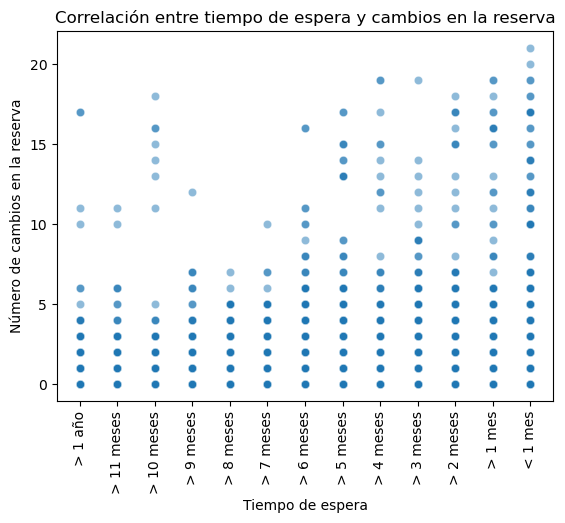

In [47]:
# Definir el orden de las categorías
order = ['> 1 año', '> 11 meses', '> 10 meses', '> 9 meses', '> 8 meses', '> 7 meses', '> 6 meses', '> 5 meses', '> 4 meses', '> 3 meses', '> 2 meses', '> 1 mes', '< 1 mes']

# Filtrar filas con valores no nulos en ambas columnas y en el orden especificado
filtered_final = final.dropna(subset=['lead_time_months', 'booking_changes'])
filtered_final['lead_time_months'] = pd.Categorical(filtered_final['lead_time_months'], categories=order, ordered=True)

# Crear el diagrama de dispersión
sns.scatterplot(data=filtered_final, x='lead_time_months', y='booking_changes', alpha=0.5)

# Configuración adicional
plt.xlabel('Tiempo de espera')
plt.ylabel('Número de cambios en la reserva')
plt.title('Correlación entre tiempo de espera y cambios en la reserva')

# Rotar las etiquetas del eje x
plt.xticks(rotation=90);


Teoria
- H0: No existe diferencia significativa
- H1: Hay diferencia significativa
    - p_value > 0.05 Aceptamos H0 --> No hay diferencia
    - p_value < 0.05 Rechazamos la hipótesis nula --> Hay diferencias

In [49]:
# Eliminar filas con valores NaN en ambas columnas
final_cleaned = final.dropna(subset=['lead_time', 'booking_changes'])

# Calcular la correlación de Pearson
correlation, p_value = pearsonr(final_cleaned['lead_time'], final_cleaned['booking_changes'])

print("Coeficiente de correlación de Pearson:", correlation)
print("Valor p:", p_value)

Coeficiente de correlación de Pearson: 0.00832051937497399
Valor p: 0.004704929563761741


El coeficiente de correlación de Pearson entre 'lead_time' y 'booking_changes' es 0.0083, lo que indica una correlación muy débil entre estas dos variables. Sin embargo, el valor p es 0.0047, que es menor que 0.05, lo que sugiere que hay diferencias significativas,no podemos dar por hecho que esta correlación sea cierta.
Por lo que rechazamos la hipotesis Nula.

### lead_time y reservation_status

In [53]:
final["reservation_status"].unique()

array(['check-out', 'canceled', 'no-show', nan], dtype=object)

In [52]:
final[["lead_time","reservation_status"]]

,lead_time,reservation_status
0,342.000000,check-out
1,737.000000,check-out
2,7.000000,check-out
3,13.000000,check-out
4,14.000000,check-out
...,...,...
182872,224.337762,NaN
182873,390.141963,NaN
182874,230.689826,NaN
182875,304.888534,NaN


In [57]:
lead_time_max_min = final["lead_time"].agg(["max", "min"])
lead_time_max_min

max    737.0
min      0.0
Name: lead_time, dtype: float64

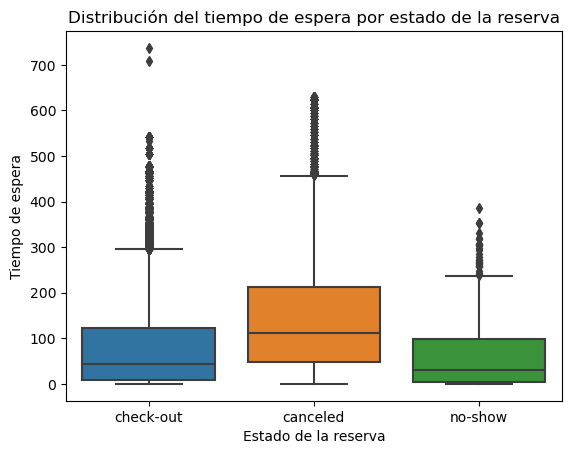

In [55]:
# Crear el gráfico de caja
sns.boxplot(x='reservation_status', y='lead_time', data=final)

# Configuración adicional
plt.xlabel('Estado de la reserva')
plt.ylabel('Tiempo de espera')
plt.title('Distribución del tiempo de espera por estado de la reserva')

# Mostrar el gráfico
plt.show()

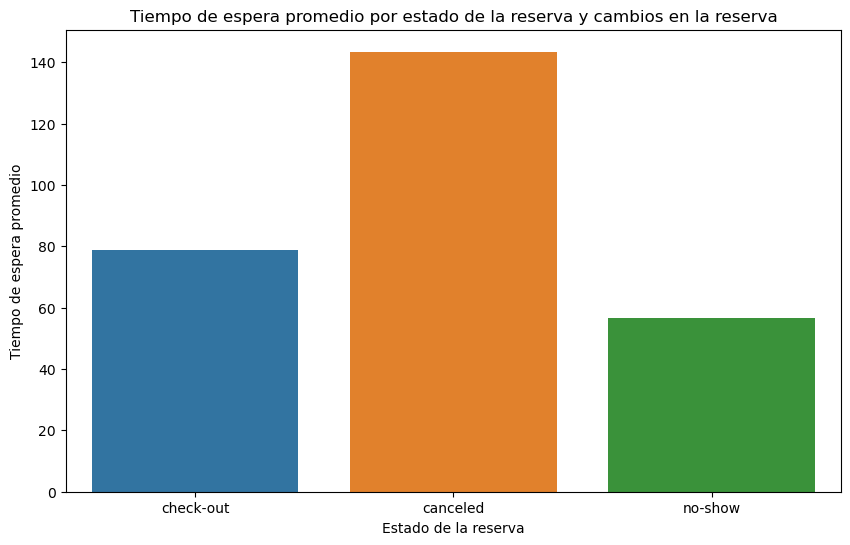

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(data=final, x='reservation_status', y='lead_time', ci=None, estimator=np.mean)

# Configuración adicional
plt.xlabel('Estado de la reserva')
plt.ylabel('Tiempo de espera promedio')
plt.title('Tiempo de espera promedio por estado de la reserva y cambios en la reserva')

# Mostrar el gráfico
plt.show()

In [69]:
import scipy.stats as stats

In [71]:

# Eliminar filas con NaN en 'lead_time'
final_cleaned = final.dropna(subset=['reservation_status'])

# Calcular la correlación de Spearman
correlation_spearman, p_value = stats.spearmanr(final_cleaned['lead_time'], final_cleaned['reservation_status'])

print("Correlación de Spearman entre lead_time y reservation_status:", correlation_spearman)
print("Valor p:", p_value)


Correlación de Spearman entre lead_time y reservation_status: -0.31812004881101086
Valor p: 0.0


La correlación de Spearman entre 'lead_time' y 'reservation_status' es de aproximadamente -0.318.

La correlación de Spearman es una medida de la relación monotónica entre dos variables. Una correlación negativa indica que hay una relación inversa entre las dos variables: a medida que una variable aumenta, la otra tiende a disminuir, y viceversa.

En este caso, una correlación de -0.318 sugiere que hay una relación moderadamente negativa entre 'lead_time' y 'reservation_status'. Específicamente, esto significa que a medida que aumenta el tiempo que pasa desde la reserva hasta el check-in ('lead_time'), es menos probable que el estado de la reserva sea 'check-out'??? o 'no-show', y más probable que sea 'canceled', y viceversa.

El valor p asociado con la correlación es 0.0, lo que indica que la probabilidad de obtener una correlación de Spearman tan extrema o más extrema por pura casualidad es prácticamente nula. Por lo tanto, podemos concluir que la correlación entre 'lead_time' y 'reservation_status' es estadísticamente significativa.